## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.


*Atenção - Utilizar a base de dados em anexo que é a mesma base que utilizamos na atividade anterior! A base Boston, assim como para a primeira atividade foi descontinuada e não deve ser utilizada*

In [11]:
import pandas as pd

import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [5]:
X = pd.DataFrame(df[['longitude', 'latitude' , 'housing_median_age', 'total_rooms' , 'total_bedrooms' , 'population' , 'households', 'median_income']])
y = pd.DataFrame(df[['median_house_value']])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2360873)

In [17]:
regr1 = DecisionTreeRegressor(max_depth=8)
regr2 = DecisionTreeRegressor(max_depth=2)

regr1.fit(X_train, y_train)
regr2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [19]:

train1 = regr1.predict(X_train)
train2 = regr2.predict(X_train)
print('Para base de treinamento:')
print('O mse com profundidade = 2, MSE=', mean_squared_error(y_train,train1))
print('O mse com profundidade = 8, MSE=', mean_squared_error(y_train,train2))

test1 = regr1.predict(X_test)
test2 = regr2.predict(X_test)
print('teste:')
print('O mse com profundidade = 2, MSE=', mean_squared_error(y_test,test1))
print('O mse com profundidade = 8, MSE=', mean_squared_error(y_test,test2))

Para base de treinamento:
O mse com profundidade = 2, MSE= 3631462701.9639277
O mse com profundidade = 8, MSE= 7411385612.543622
teste:
O mse com profundidade = 2, MSE= 4323707571.500119
O mse com profundidade = 8, MSE= 7225244557.008624


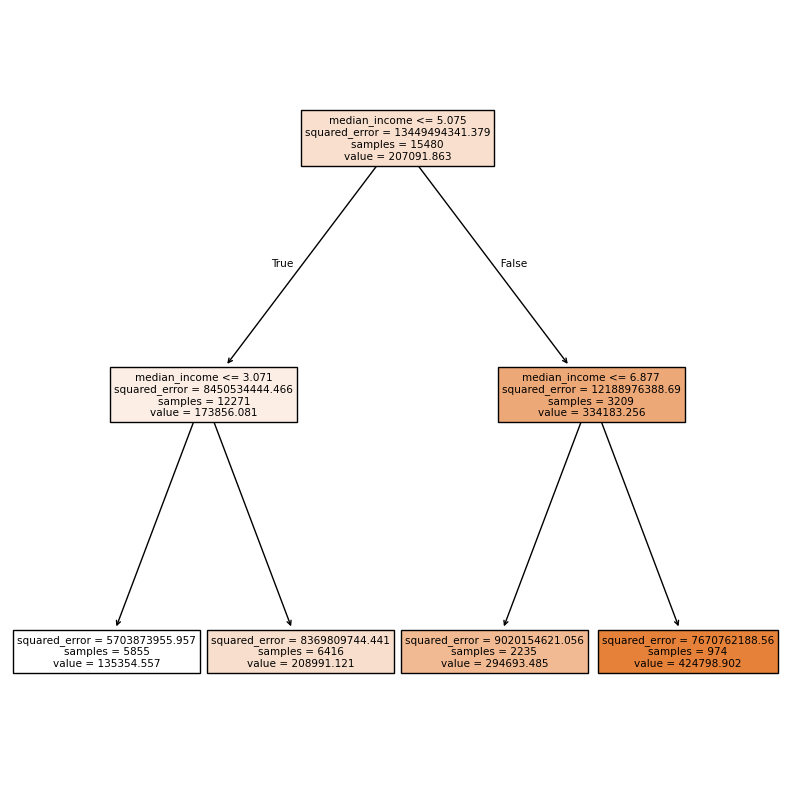

In [21]:
plt.rc('figure', figsize=(10, 10))
tp = tree.plot_tree(regr2, 
                    feature_names=X.columns,  
                    filled=True) 

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [27]:
path = regr2.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.00000000e+00, 7.41799566e+08, 1.07232731e+09, 4.22398185e+09]),
 'impurities': array([7.41138561e+09, 8.15318518e+09, 9.22551249e+09, 1.34494943e+10])}

Text(0, 0.5, 'Impureza total das folhas')

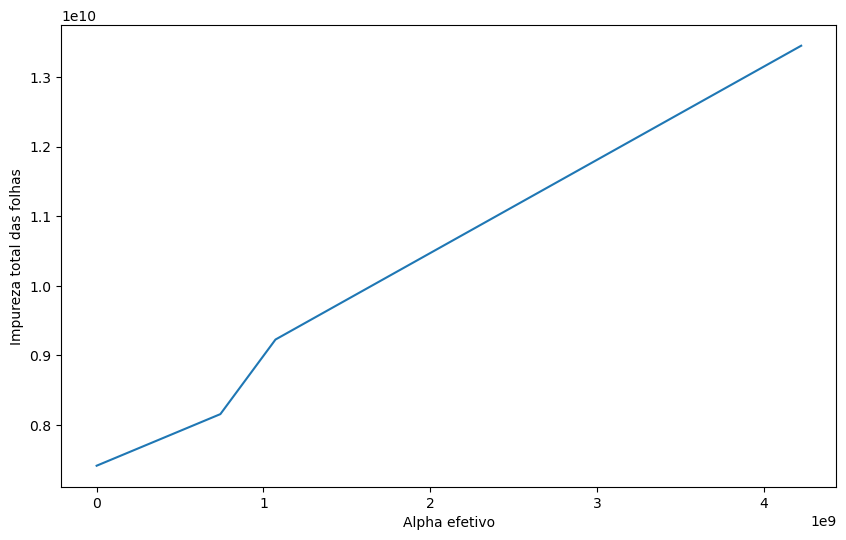

In [29]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [31]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

Text(0, 0.5, 'Profundidade da árvore')

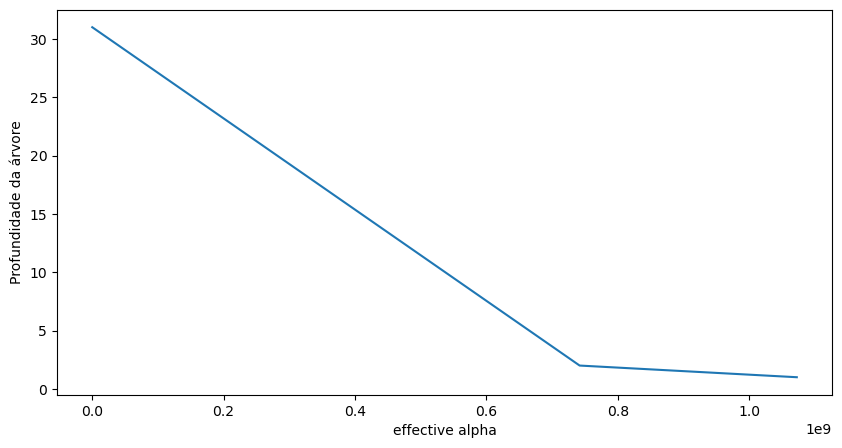

In [33]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  5))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Profundidade da árvore")

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [35]:
train_scores = [mean_squared_error(y_train, clf.predict(X_train)) for clf in clfs]
test_scores = [mean_squared_error(y_test, clf.predict(X_test)) for clf in clfs]

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

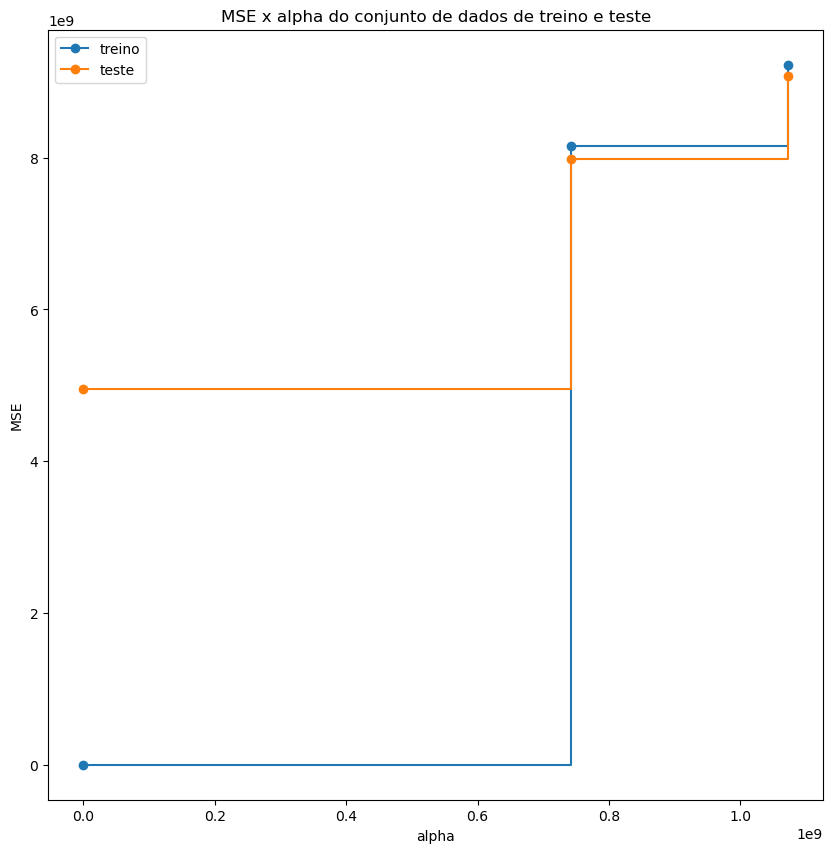

In [37]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()


### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [39]:
arvore_final = DecisionTreeRegressor (random_state=0, ccp_alpha=.7)
arvore_final.fit(X_train, y_train)

print(f'Profundidade: {arvore_final.tree_.max_depth}')
print(f'R-quadrado na base de testes: {arvore_final.score(X_test, y_test):.2f}')
print(f'MSE na base de testes: {mean_squared_error(y_train , arvore_final.predict(X_train)):.2f}')

Profundidade: 31
R-quadrado na base de testes: 0.62
MSE na base de testes: 310644.60


### 7. Visualize esta árvore.

In [ ]:
plt.rc('figure', figsize=(10, 10))
tp = tree.plot_tree(arvore_final, 
                    feature_names=X.columns,  
                    filled=True) 